In [1]:
import fishts
import fishts.transformers as t
from fishts.descriptors.time_series import extract_ts_descriptor
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
transforms = t.Compose([
    t.ConvertColor(cv2.COLOR_BGR2GRAY),
    t.Resize(proportion_scale=True, g_measure=300),
    t.GaussianBlur(kernel_size=(5,5), sigma_x=0),
    t.Threshold(60, 255, cv2.THRESH_BINARY),
    t.CannyEdge(threshold_1=50, threshold_2=100),
    t.Dilate(kernel=None, iterations=1),
    t.Erode(kernel=None, iterations=1),
])

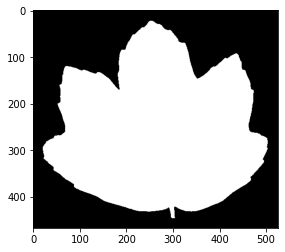

In [3]:
image = cv2.imread('../data/leafs/1.jpg')
plt.imshow(image)

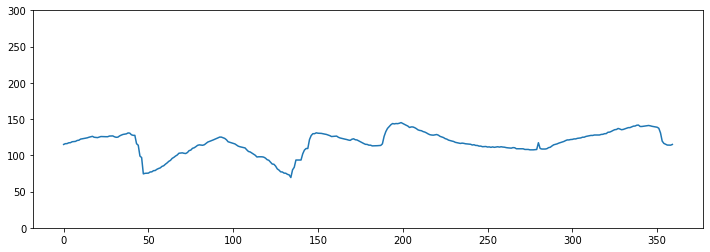

In [4]:
transformed = transforms(image)

ts = extract_ts_descriptor(transformed, start_angle=0, end_angle=360, step=1)
x = np.arange(0, 360, 1)

fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.plot(x, ts)
ax.set_ylim([0, max(transformed.shape)])

plt.show()

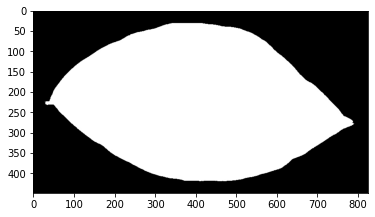

In [5]:
image = cv2.imread('../data/leafs/8.jpg')
plt.imshow(image)

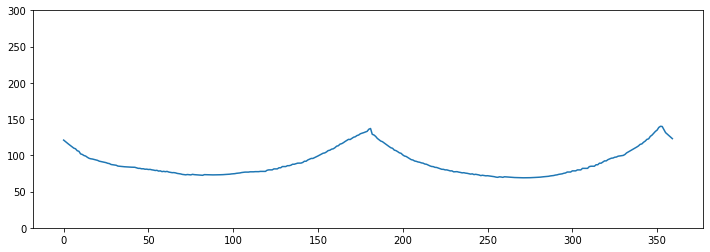

In [6]:
transformed = transforms(image)

ts = extract_ts_descriptor(transformed, start_angle=0, end_angle=360, step=1)
x = np.arange(0, 360, 1)

fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.plot(x, ts)
ax.set_ylim([0, max(transformed.shape)])

plt.show()

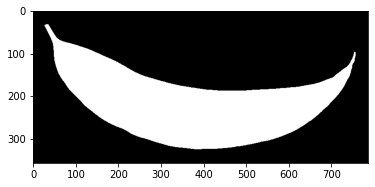

In [7]:
image = cv2.imread('../data/leafs/23.jpg')
plt.imshow(image)

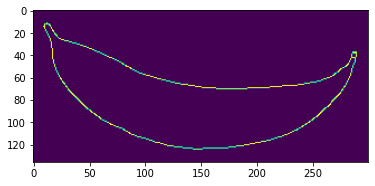

In [12]:
plt.imshow(transformed)

In [11]:
M = cv2.moments(transformed)
centroid_x = int(M['m10']/M['m00'])
centroid_y = int(M['m01']/M['m00'])
centroid_x, centroid_y

(147, 74)

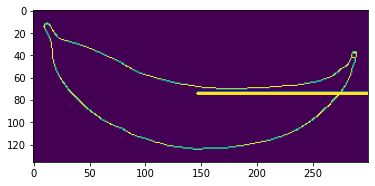

In [15]:
ref = transformed.copy()
cv2.line(ref, (centroid_x, centroid_y), (int(centroid_x + np.cos(0) * 400), int(centroid_y - np.sin(0) * 400)), 255, 2)
plt.imshow(ref)

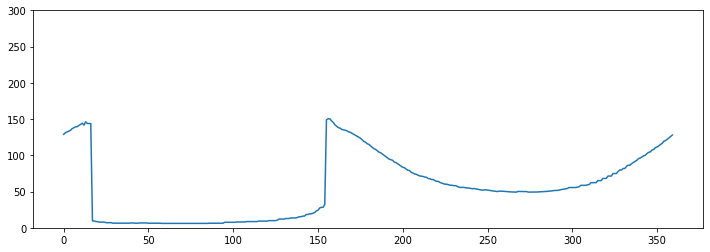

In [8]:
transformed = transforms(image)

ts = extract_ts_descriptor(transformed, start_angle=0, end_angle=360, step=1)
x = np.arange(0, 360, 1)

fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.plot(x, ts)
ax.set_ylim([0, max(transformed.shape)])

plt.show()